#Weight Decay (Section 3.7)
- A. Experiment with the value of the regularization parameter λ in the estimation problem. Plot training and validation accuracy as a function of λ. What do you observe?
Can you identify an optimal λ

In [ ]:
!pip install d2l==1.0.3
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l
import numpy as np
import matplotlib.pyplot as plt

#print(trainer.model.loss)

# Original Evaluation
This orignal code tests a single lambda value in order to discover there the validation loss and training loss are stored. The code presents how these loss values can be accessed in the model.board.data dictionary.

L2 norm of w: 0.014949518255889416


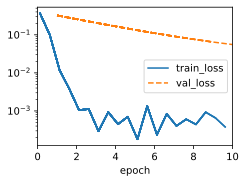

In [13]:
class Data(d2l.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        w, b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = torch.matmul(self.X, w) + b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)

def l2_penalty(w):
    return (w ** 2).sum() / 2


class WeightDecay(d2l.LinearRegression):
    def __init__(self, wd, lr):
        super().__init__(lr)
        self.save_hyperparameters()
        self.wd = wd
        self.validation_losses = []  # Add validation_losses attribute


    def configure_optimizers(self):
        return torch.optim.SGD([
            {'params': self.net.weight, 'weight_decay': self.wd},
            {'params': self.net.bias}], lr=self.lr)

data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)

model = WeightDecay(wd=3, lr=0.01)
model.board.yscale='log'
trainer.fit(model, data)

print('L2 norm of w:', float(l2_penalty(model.get_w_b()[0])))

In [14]:
# finding where the loss values are stored for each epoch to utilize in the second half of the code
keys = model.board.data.keys()
print("Keys in model.board.data:")
print(keys)

print((model.board.data))

for point in model.board.data['train_loss']:
    print(f"Epoch {point.x}: {point.y}")


print("\nValidation Loss:")
for point in model.board.data['val_loss']:
    print(f"Epoch {point.x}: {point.y}")

model.board.data['val_loss'][-1]

Keys in model.board.data:
odict_keys(['train_loss', 'val_loss'])
OrderedDict([('train_loss', [Point(x=0.125, y=0.3625871315598488), Point(x=0.625, y=0.09902507439255714), Point(x=1.125, y=0.011895951814949512), Point(x=1.625, y=0.0037917979061603546), Point(x=2.125, y=0.0010538942879065871), Point(x=2.625, y=0.0011186178599018604), Point(x=3.125, y=0.0002930374030256644), Point(x=3.625, y=0.0009302268153987825), Point(x=4.125, y=0.00044961039384361356), Point(x=4.625, y=0.0007015908777248114), Point(x=5.125, y=0.00018056102271657437), Point(x=5.625, y=0.0013402884942479432), Point(x=6.125, y=0.00023565928859170526), Point(x=6.625, y=0.0008364463574253023), Point(x=7.125, y=0.00040427361091133207), Point(x=7.625, y=0.0006040543084964156), Point(x=8.125, y=0.0004418633907334879), Point(x=8.625, y=0.0009268131689168513), Point(x=9.125, y=0.0006553855928359553), Point(x=9.625, y=0.0003789843467529863)]), ('val_loss', [Point(x=1.0, y=0.32327700313180685), Point(x=2.0, y=0.2577259449288249),

Point(x=10.0, y=0.055456874426454306)

# Running the graph for multiple lambdas
After understanding where the loss values are stored in the first part of the code this second portion tests how the validation error and training loss change when different lambda values are utilized.

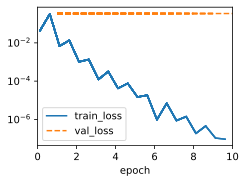

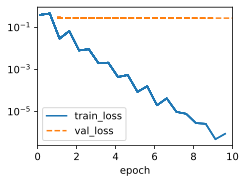

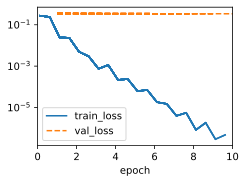

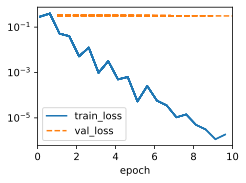

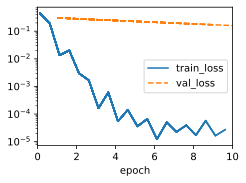

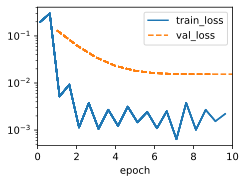

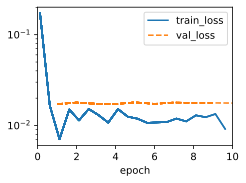

In [29]:
class Data(d2l.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        w, b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = torch.matmul(self.X, w) + b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)


def l2_penalty(w):
    return (w ** 2).sum() / 2


class WeightDecay(d2l.LinearRegression):
    def __init__(self, wd, lr):
        super().__init__(lr)
        self.save_hyperparameters()
        self.wd = wd

    def configure_optimizers(self):
        return torch.optim.SGD([
            {'params': self.net.weight, 'weight_decay': self.wd},
            {'params': self.net.bias}], lr=self.lr)

data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)

# Define the range of weight decay values you want to test
wd_values = [0, 0.001, 0.01, 0.1, 1, 10, 100]

# Dictionary to store losses for each wd_value
losses_by_wd = {}

# Loop through each weight decay value and evaluate the model
for wd in wd_values:
    # Create a new instance of the WeightDecay model with the current wd value
    model = WeightDecay(wd=wd, lr=0.01)
    model.board.yscale = 'log'

    # Train the model
    trainer.fit(model, data)

    val_loss_points = model.board.data['val_loss'][-1:]  # get last entry for val_loss
    train_loss_points = model.board.data['train_loss'][-1:]  # get last entry for train_loss

    # Store the losses for this wd_value
    losses_by_wd[wd] = {'val_loss': val_loss_points, 'train_loss': train_loss_points}


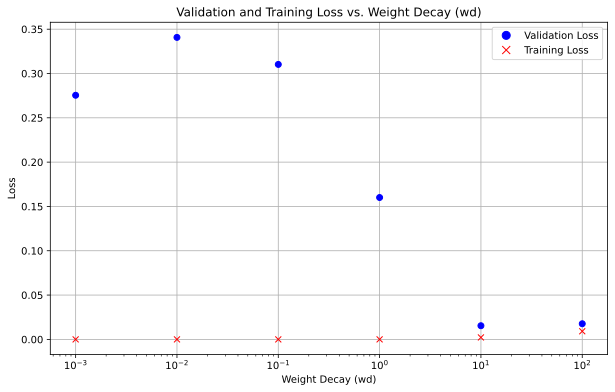

In [30]:
# Plot validation loss as a function of wd and training losses as a function of wd
plt.figure(figsize=(10, 6))

# Plot validation loss
for wd, losses in losses_by_wd.items():
    val_loss_x = [point.x for point in losses['val_loss']]
    val_loss_y = [point.y for point in losses['val_loss']]
    plt.plot([wd] * len(val_loss_x), val_loss_y, 'bo', label=f'Validation Loss (wd={wd})')

# Plot training loss
for wd, losses in losses_by_wd.items():
    train_loss_x = [point.x for point in losses['train_loss']]
    train_loss_y = [point.y for point in losses['train_loss']]
    plt.plot([wd] * len(train_loss_x), train_loss_y, 'rx', label=f'Training Loss (wd={wd})')

plt.xscale('log')  # Set logarithmic scale for x-axis
plt.xlabel('Weight Decay (wd)')
plt.ylabel('Loss')
plt.title('Validation and Training Loss vs. Weight Decay (wd)')
plt.grid(True)

# Create custom legend with red x and blue circle
blue_circle = plt.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=8, label='Validation Loss')
red_x = plt.Line2D([], [], color='red', marker='x', linestyle='None', markersize=8, label='Training Loss')
plt.legend(handles=[blue_circle, red_x], loc='upper right')

plt.show()

The optimal λ for this routine is approximately 100 as shown in the figure in  Ritterbusch-Kalicak-Problem3.ipynb.